In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

[[ 1.          0.79450336]
 [ 1.          0.12696897]
 [ 1.          0.94509697]
 [ 1.         -0.10345629]
 [ 1.          0.13704492]
 [ 1.          0.75974373]
 [ 1.         -0.31090068]
 [ 1.          0.93817028]
 [ 1.         -0.57156317]
 [ 1.          0.68892174]
 [ 1.          0.56892434]
 [ 1.          0.1388437 ]
 [ 1.         -0.64133134]
 [ 1.         -0.89245613]
 [ 1.          0.03289048]
 [ 1.         -0.27063001]
 [ 1.         -0.9566174 ]
 [ 1.          0.61614929]
 [ 1.          0.91653862]
 [ 1.          0.43903592]
 [ 1.          0.54279118]
 [ 1.         -0.85873157]
 [ 1.         -0.75705606]
 [ 1.          0.61063915]
 [ 1.         -0.78665402]
 [ 1.          0.75107802]
 [ 1.         -0.98222183]
 [ 1.          0.14708031]
 [ 1.         -0.62121502]
 [ 1.          0.10163891]]


Optimizing:  66%|██████▌   | 99/150 [00:00<00:00, 5359.27it/s]


Iter 1: max_index=24, max_d=1.8656, alpha=0.5000
Iter 2: max_index=5, max_d=3.0559, alpha=0.3333
Iter 3: max_index=22, max_d=1.5435, alpha=0.2500
Iter 4: max_index=25, max_d=1.9943, alpha=0.2000
Iter 5: max_index=22, max_d=1.5198, alpha=0.1667
Iter 6: max_index=25, max_d=1.7958, alpha=0.1429
Iter 7: max_index=22, max_d=1.5099, alpha=0.1250
Iter 8: max_index=25, max_d=1.7107, alpha=0.1111
Iter 9: max_index=22, max_d=1.5045, alpha=0.1000
Iter 10: max_index=25, max_d=1.6634, alpha=0.0909
Iter 11: max_index=22, max_d=1.5011, alpha=0.0833
Iter 12: max_index=25, max_d=1.6333, alpha=0.0769
Iter 13: max_index=22, max_d=1.4987, alpha=0.0714
Iter 14: max_index=25, max_d=1.6125, alpha=0.0667
Iter 15: max_index=25, max_d=1.4974, alpha=0.0625
Iter 16: max_index=22, max_d=1.5968, alpha=0.0588
Iter 17: max_index=25, max_d=1.4974, alpha=0.0556
Iter 18: max_index=22, max_d=1.5836, alpha=0.0526
Iter 19: max_index=25, max_d=1.4975, alpha=0.0500
Iter 20: max_index=22, max_d=1.5733, alpha=0.0476
Iter 21: m

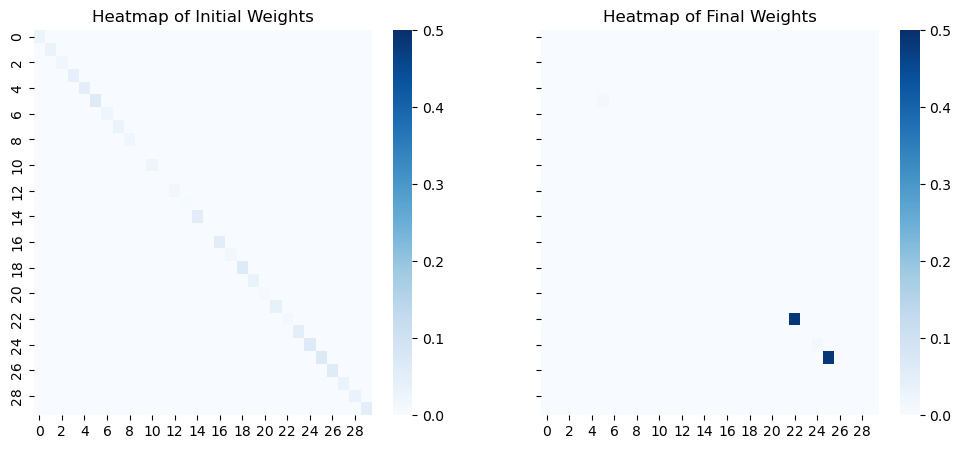

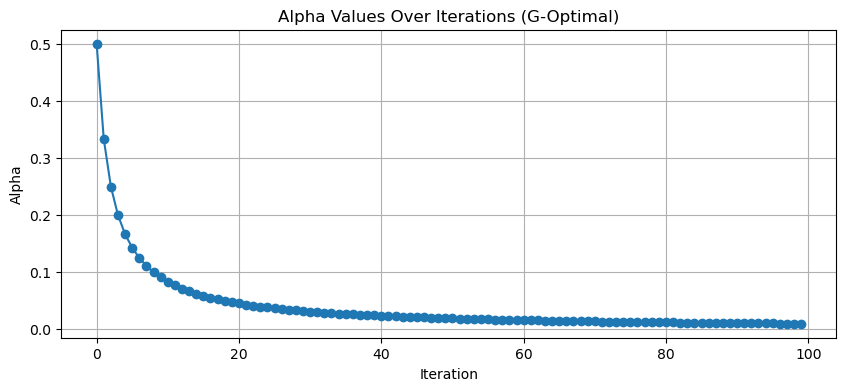

In [2]:
# --- Model Setup ---
num_points = 30
num_iterations = 150
p = 2  # (1, x) -> two basis functions

np.random.seed(390)
X_raw = 2 * np.random.rand(num_points) - 1
n = X_raw.shape[0]

# Build X matrix = [1, x]
X = np.column_stack([np.ones(n, dtype=int), X_raw])

print(X)

# Define heteroscedastic variance function A(x)
A = lambda x: 1.5 - np.abs(x)
A_vec = A(X_raw)  # A(x_i) for each point

# Initial weights
initial_weights = np.random.rand(n)
weights = np.diag(initial_weights / np.sum(initial_weights))

# Plot initial weights
vmax = 0.5
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.heatmap(weights, annot=False, ax=axes[0], cmap='Blues', cbar=True, vmax=vmax)
axes[0].set_title('Heatmap of Initial Weights')

alpha_history = []

# --- G-Optimal Iteration ---
for i in tqdm(range(num_iterations), desc='Optimizing'):
    M = X.T @ weights @ X
    if np.linalg.det(M) == 0:
        print("Singular matrix at iteration", i)
        break
    M_inv = np.linalg.inv(M)

    # G-optimal criterion: A(x) * f.T @ M^-1 @ f
    d_values = np.array([A_vec[j] * (X[j].T @ M_inv @ X[j]) for j in range(n)])
    max_index = np.argmax(d_values)
    max_d = d_values[max_index]

    # Update
    alpha_i = 1/(i+2)
    alpha_history.append(alpha_i)

    # Update weights
    new_weights = (1 - alpha_i) * weights
    new_weights[max_index, max_index] += 1 - np.sum(new_weights)
    weights = new_weights

    if i <= 24:
        print(f"Iter {i+1}: max_index={max_index}, max_d={max_d:.4f}, alpha={alpha_i:.4f}")
    
    if i == 25:
        print("......")

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break

# Pick up outstanding data: Expect to be ~ 0.75 and ~ -0.75

final_weights = np.diag(weights)
average_weight = np.mean(final_weights)
standout_threshold = average_weight + 2 * np.std(final_weights)
standout_indices = np.where(final_weights > standout_threshold)[0]  # Get indices of standout weights
standout_data = X_raw[standout_indices]
standout_weights = final_weights[standout_indices]

print("Standout data and their indices:")
for data, weight in zip(standout_data, standout_weights):
    print(f"Data: {data}, Weight: {weight:.4f}")


# --- Plots ---
sns.heatmap(weights, ax=axes[1], annot=False, cmap='Blues', cbar=True, vmax=vmax)
axes[1].set_title('Heatmap of Final Weights')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(alpha_history, marker='o')
plt.title('Alpha Values Over Iterations (G-Optimal)')
plt.xlabel('Iteration')
plt.ylabel('Alpha')
plt.grid(True)
plt.show()